## Loading Dataset

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## Data Preparation

### Separating data into X and Y

In [3]:
Y = df['logS']
Y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [4]:
X = df.drop('logS', axis=1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


### Splitting the data to taining sets

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [6]:
X_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [7]:
X_test 

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


## Building Model

### Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

### Predicting the model

In [9]:
Y_lr_train_pred = lr.predict(X_train)
Y_lr_test_pred = lr.predict(X_test)

In [10]:
Y_lr_train_pred

array([-2.83668969,  0.84208401, -0.50930302, -0.13058053, -1.6269208 ,
       -2.86103037, -2.32208333, -4.16684323, -5.04235077, -2.29737009,
       -3.15082845, -4.33037208, -1.43700682, -2.59060064, -7.09025955,
       -2.32734557, -4.19073421, -2.63904005, -3.58104074, -3.75929058,
       -2.5501665 , -3.26968347, -2.78911367, -2.69251051, -0.77437547,
       -6.61955792, -2.99084623, -2.36975061, -7.18167736, -1.52816491,
       -4.81736265, -0.86996608, -7.09025955, -1.87404275, -2.58013247,
       -4.80953284, -4.17454084, -1.95444152, -3.50503339, -2.7411418 ,
       -1.87131835, -2.45270806, -3.07252433, -1.48988982, -3.98778754,
       -1.35216679, -0.16932277, -6.05237002, -3.29550658,  0.30513174,
       -3.25501463, -5.31993586, -0.4733928 , -4.79180882, -5.82486323,
       -2.70343539, -3.70838271, -2.4987341 , -2.12301018, -3.11393974,
       -2.79842053, -1.38274662, -4.3267103 , -3.57778946, -3.42356884,
       -9.15826626, -6.52588866, -1.75832085, -4.97842312, -1.59

In [11]:
Y_lr_test_pred

array([-3.05722870e+00, -7.77785827e+00, -2.55016650e+00, -2.01523582e+00,
       -2.06375990e+00, -9.99672215e-01, -5.94603364e-01, -5.53626003e-01,
       -5.72200956e+00, -3.94006681e+00, -3.95496755e+00, -2.29737009e+00,
       -1.48980354e+00, -1.48988982e+00, -4.64510806e+00, -1.90396018e+00,
       -1.51566313e+00, -3.16424605e+00, -3.70863920e+00, -5.58105660e+00,
       -3.25038467e+00, -5.04235077e+00, -5.69194881e+00, -2.14339849e+00,
       -4.35689341e+00, -5.03964756e+00, -3.10383618e+00, -4.40286964e+00,
       -4.21276272e+00,  5.56508349e-01, -1.45537678e+00, -4.41027396e+00,
       -2.59668773e+00, -1.53336276e+00, -5.55749874e-01, -1.67111795e+00,
       -2.78163675e+00, -3.15395565e+00, -5.27083361e+00, -1.75321446e+00,
       -1.53350725e+00, -2.01255666e+00, -6.57559167e+00, -7.89433046e+00,
       -5.76437127e+00, -4.16422068e+00, -3.43694663e+00,  1.43834212e+00,
       -1.12679105e-02, -2.34521849e+00, -1.86480046e+00, -5.03964756e+00,
        8.55886378e-01, -

#### Evaluating the Model

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(Y_train, Y_lr_train_pred)
lr_train_r2score = r2_score(Y_train, Y_lr_train_pred)

lr_test_mse = mean_squared_error(Y_test, Y_lr_test_pred)
lr_test_r2score = r2_score(Y_test, Y_lr_test_pred)


In [13]:
lr_train_mse

1.0075362951093687

In [14]:
lr_train_r2score

0.7645051774663391

In [15]:
lr_test_mse

1.0206953660861033

In [16]:
lr_test_r2score

0.7891616188563282

In [19]:
metrics_df = pd.DataFrame({
    'Metric': ['MSE', 'R2 Score'],
    'Training Set': [lr_train_mse, lr_train_r2score],
    'Testing Set': [lr_test_mse, lr_test_r2score]
})

# Set 'Metric' as the index
metrics_df.set_index('Metric', inplace=True)

metrics_df

,Training Set,Testing Set
Metric,,
MSE,1.007536,1.020695
R2 Score,0.764505,0.789162


##### 
Interpretation: 

 Training Set Performance:
Training MSE (lr_train_mse) = 1.0075
→ On average, the squared error between predicted and actual values for the training set is about 1.0075.
(Lower MSE is better.)

Training R² score (lr_train_r2score) = 0.7645
→ About 76.45% of the variability in the training data is explained by the model.
(Closer to 1 is better; 0.76 is generally considered good, but not perfect.)

#####
Testing Set Performance:
Testing MSE (lr_test_mse) = 1.0207
→ The average squared error on the test set is about 1.0207, very close to the training MSE.
(This suggests the model generalizes well to unseen data.)

Testing R² score (lr_test_r2score) = 0.7891
→ About 78.91% of the variability in the test data is explained by the model.


### Residual Plot

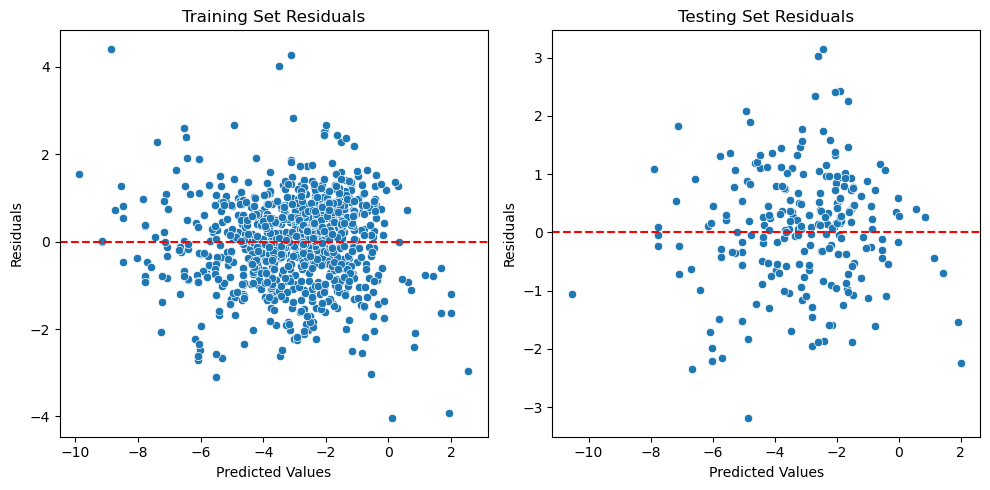

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
train_residuals = Y_train - Y_lr_train_pred
test_residuals = Y_test - Y_lr_test_pred

# Plot residuals for both training and testing sets
plt.figure(figsize=(10,5))

# Training set residual plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=Y_lr_train_pred, y=train_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Training Set Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Testing set residual plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=Y_lr_test_pred, y=test_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Testing Set Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

#####
Overall Interpretation:

Training Set Residuals:
The residuals are randomly scattered around the horizontal line at 0 (the red dashed line).

There's no clear pattern (like curves, funnel shapes, etc.), which suggests:

The model fits the training data well.

Linearity assumption is reasonably satisfied.

Good model behavior overall on training data.

No major violation of regression assumptions.

Testing Set Residuals:

Residuals are also randomly scattered around the horizontal line at 0.

However, compared to the training set:

The spread of residuals seems a bit wider.

There are a few more visible outliers.

Model generalizes fairly well, but with slightly less precision compared to the training set.

Still acceptable; no obvious systematic errors or strong patterns.

### Prediction vs. Actual Plot

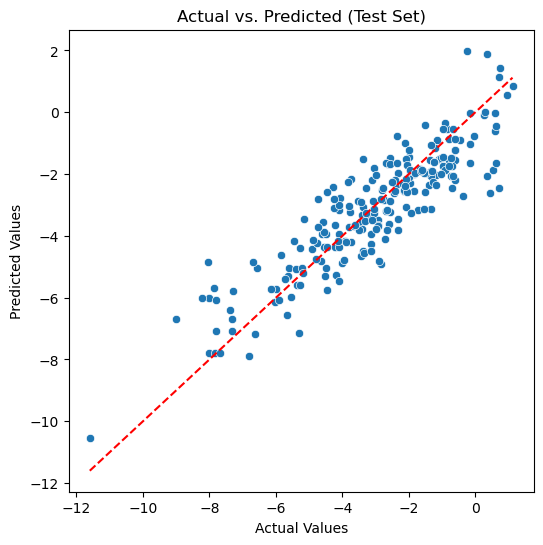

In [21]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=Y_test, y=Y_lr_test_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted (Test Set)')
plt.show()

#####
Interpretation: 

The scatter points are closely aligned with the red dashed line (perfect prediction line).

Most predictions are accurate with small deviations.

No major systematic errors or strong patterns are visible.

A few outliers exist, but they are not extreme.

The model generalizes well across the range of actual values.

Overall, the model shows good prediction accuracy and consistent performance on the test set.